In [1]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Correct_Assignment data set_Feb_24_SCC.xlsx to Correct_Assignment data set_Feb_24_SCC.xlsx


# 1.1. DATA PROCESSING

In [2]:
# Load the dataset with 'latin1' encoding
data = pd.read_excel("Correct_Assignment data set_Feb_24_SCC.xlsx")

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Displaying summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())


First few rows of the dataset:
        Date Country(UK) Confectionary  Units Sold  Revenue(£)  Cost(£)  \
0 2002-11-11     England       Biscuit      1118.0      5590.0   2459.6   
1 2002-07-05     England       Biscuit       708.0      3540.0   1557.6   
2 2001-10-31     England       Biscuit      1269.0      6345.0   2791.8   
3 2004-09-13     England       Biscuit      1631.0      8155.0   3588.2   
4 2004-03-10     England       Biscuit      2240.0     11200.0   4928.0   

   Profit(£)  
0     3130.4  
1     1982.4  
2     3553.2  
3     4566.8  
4     6272.0  

Summary statistics of the dataset:
                                Date   Units Sold    Revenue(£)       Cost(£)  \
count                           1001   996.000000    992.000000    992.000000   
mean   2002-11-19 10:54:32.727272832  1633.360442   6847.601815   2820.190877   
min              2000-01-02 00:00:00   200.000000    200.000000     40.000000   
25%              2001-05-12 00:00:00   923.000000   2993.000000   12

In [3]:
# Step 2: Missing Values Check

# Checking for missing values and printing the counts for each column
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
Date             0
Country(UK)      0
Confectionary    0
Units Sold       5
Revenue(£)       9
Cost(£)          9
Profit(£)        3
dtype: int64


In [4]:
# Step 3: Handling Missing Values

# Fill missing values in the dataset
data['Units Sold'].fillna(data['Units Sold'].mean(), inplace=True)
data['Revenue(£)'].fillna(data['Revenue(£)'].mean(), inplace=True)
data['Cost(£)'].fillna(data['Cost(£)'].mean(), inplace=True)
data['Profit(£)'].fillna(data['Profit(£)'].mean(), inplace=True)

# Verify if missing values have been filled
print("Missing values in the dataset after filling:")
print(data.isnull().sum())


Missing values in the dataset after filling:
Date             0
Country(UK)      0
Confectionary    0
Units Sold       0
Revenue(£)       0
Cost(£)          0
Profit(£)        0
dtype: int64


# 1.2. Outlier Detection

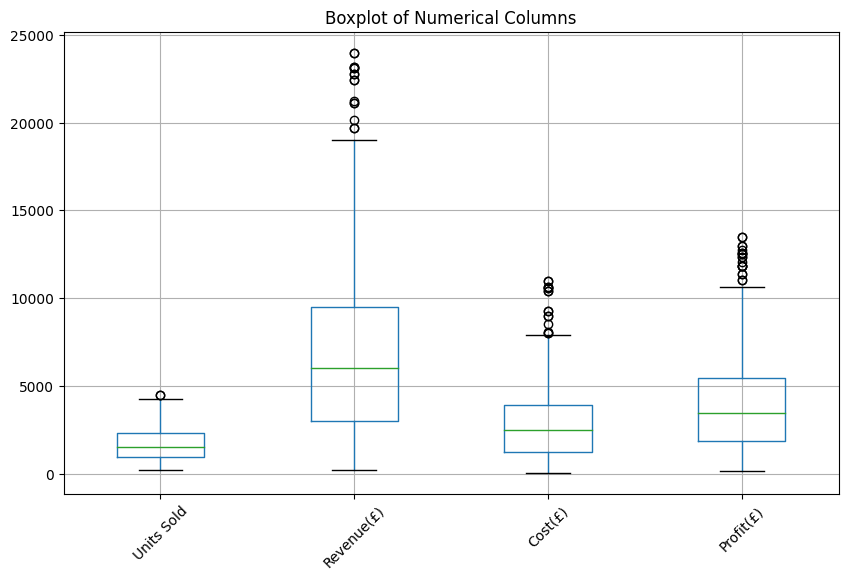

In [ ]:
# Step 4: Outliers Detection

# Visualizing outliers using boxplots
import matplotlib.pyplot as plt

# Create boxplots for each numerical column
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Step 5: Outlier Detection using Z-Score Method

# Importing necessary library
from scipy import stats

# Setting threshold for Z-score
threshold = 3

# Calculating Z-scores for each numerical column
z_scores = stats.zscore(data[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']])

# Identifying outliers based on Z-score exceeding the threshold
outliers = data[(z_scores > threshold).any(axis=1)]

# Printing the identified outliers
print("Outliers detected using Z-score method:")
print(outliers)


Outliers detected using Z-score method:
    Country(UK)  Confectionary  Units Sold  Revenue(£)   Cost(£)  Profit(£)
43      England   Caramel nut       3851.0     23106.0  10590.25   12515.75
50      England   Caramel nut       3794.0     22764.0  10433.50   12330.50
147    Scotland   Caramel nut       3864.0     23184.0  10626.00   12558.00
157    Scotland   Caramel nut       3998.0     23988.0  10994.50   12993.50
204       Wales       Biscuit       4220.0     21100.0   9284.00   11816.00
373      Jersey       Caramel       4493.0     22465.0   8986.00   13479.00
486     England       Caramel       4251.0     21255.0   8502.00   12753.00
495     England       Caramel       4026.0     20130.0   8052.00   12078.00
568     England       Caramel       3851.0     23106.0  10590.25   12515.75
575     England       Caramel       3794.0     22764.0  10433.50   12330.50
672    Scotland   Caramel Nut       3864.0     23184.0  10626.00   12558.00
682    Scotland   Caramel Nut       3998.0     2

# 1.3. Correlation

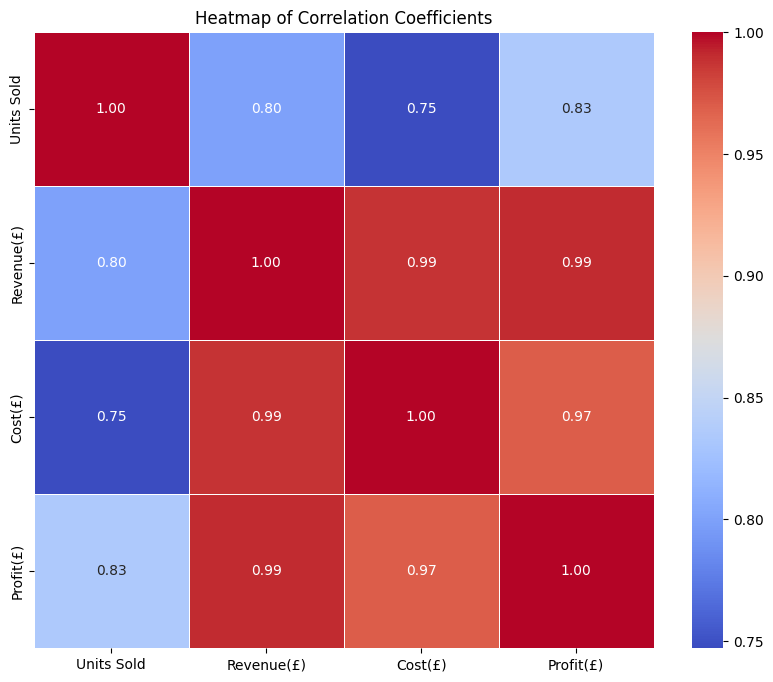

Correlation Matrix:
            Units Sold  Revenue(£)   Cost(£)  Profit(£)
Units Sold    1.000000    0.799822  0.747128   0.834562
Revenue(£)    0.799822    1.000000  0.987456   0.990139
Cost(£)       0.747128    0.987456  1.000000   0.969486
Profit(£)     0.834562    0.990139  0.969486   1.000000


In [ ]:
# Step 6: Correlation Coefficient Analysis

# Selecting only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


# 1.4. Regression Models

In [ ]:
# Step 7: Simple Regression Analysis

# Importing necessary library
import statsmodels.api as sm

# Defining the states for analysis
states = ['England', 'Jersey', 'N. Ireland', 'Wales', 'Scotland']

# Performing simple regression analysis for each state
for state in states:
    # Filtering data for the current state
    state_data = data[data['Country(UK)'] == state]

    # Defining dependent and independent variables
    y = state_data['Profit(£)']
    X = state_data['Units Sold']
    X = sm.add_constant(X)  # Adding a constant term to the independent variable

    # Fitting the regression model
    model = sm.OLS(y, X).fit()

    # Printing the regression results
    print(f"Regression Analysis for {state}:")
    print(model.summary())
    print("\n")


Regression Analysis for England:
                            OLS Regression Results                            
Dep. Variable:              Profit(£)   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     359.2
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           1.22e-42
Time:                        14:51:28   Log-Likelihood:                -1401.4
No. Observations:                 161   AIC:                             2807.
Df Residuals:                     159   BIC:                             2813.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.03

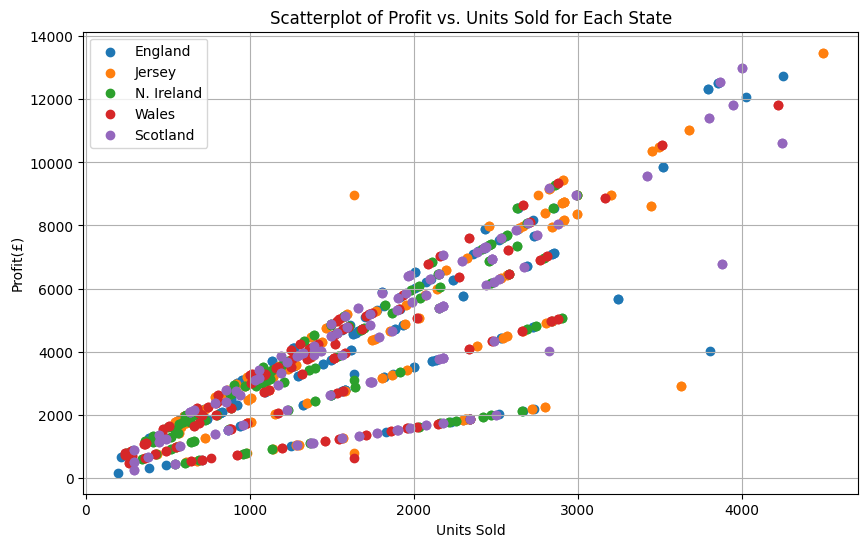

In [ ]:
# Importing necessary library
import matplotlib.pyplot as plt


# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting scatterplots for each state
for state in states:
    # Filtering data for the current state
    state_data = data[data['Country(UK)'] == state]

    # Plotting scatterplot for the current state
    ax.scatter(state_data['Units Sold'], state_data['Profit(£)'], label=state)

# Adding labels and title
ax.set_xlabel('Units Sold')
ax.set_ylabel('Profit(£)')
ax.set_title('Scatterplot of Profit vs. Units Sold for Each State')
ax.legend()

# Displaying the plot
plt.grid(True)
plt.show()


# 1.5. Multiple Regression

In [ ]:
# Step 8: Multiple Regression Analysis

# Performing multiple regression analysis for each state
for state in states:
    # Filtering data for the current state
    state_data = data[data['Country(UK)'] == state]

    # Checking if the filtered dataset is not empty
    if not state_data.empty:
        # Defining dependent and independent variables
        y = state_data['Profit(£)']
        X = state_data[['Units Sold', 'Revenue(£)', 'Cost(£)']]
        X = sm.add_constant(X)  # Adding a constant term to the independent variables

        # Fitting the regression model
        model = sm.OLS(y, X).fit()

        # Printing the regression results
        print(f"Multiple Regression Analysis for {state}:")
        print(model.summary())
        print("\n")
    else:
        print(f"No data available for {state}. Skipping regression analysis.\n")


Multiple Regression Analysis for England:
                            OLS Regression Results                            
Dep. Variable:              Profit(£)   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5530.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          6.31e-159
Time:                        15:11:27   Log-Likelihood:                -1120.6
No. Observations:                 161   AIC:                             2249.
Df Residuals:                     157   BIC:                             2261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

# 1.6. Profit analysis

In [ ]:
import pandas as pd


# Correcting typos in confectionary names
data['Confectionary'] = data['Confectionary'].replace({'Choclate Chunk': 'Chocolate Chunk', 'Caramel nut': 'Caramel Nut'})

# Grouping and summing profits for each confectionary
confectionary_profit = data.groupby('Confectionary')['Profit(£)'].sum()

# Find confectionary with highest and lowest profits
highest_profit_confectionary = confectionary_profit.idxmax()
lowest_profit_confectionary = confectionary_profit.idxmin()

# Print the results
print(f"Confectionary with the highest profits: {highest_profit_confectionary}")
print(f"Confectionary with the lowest profits: {lowest_profit_confectionary}")


Confectionary with the highest profits:  Caramel 
Confectionary with the lowest profits:  Chocolate Chunk 


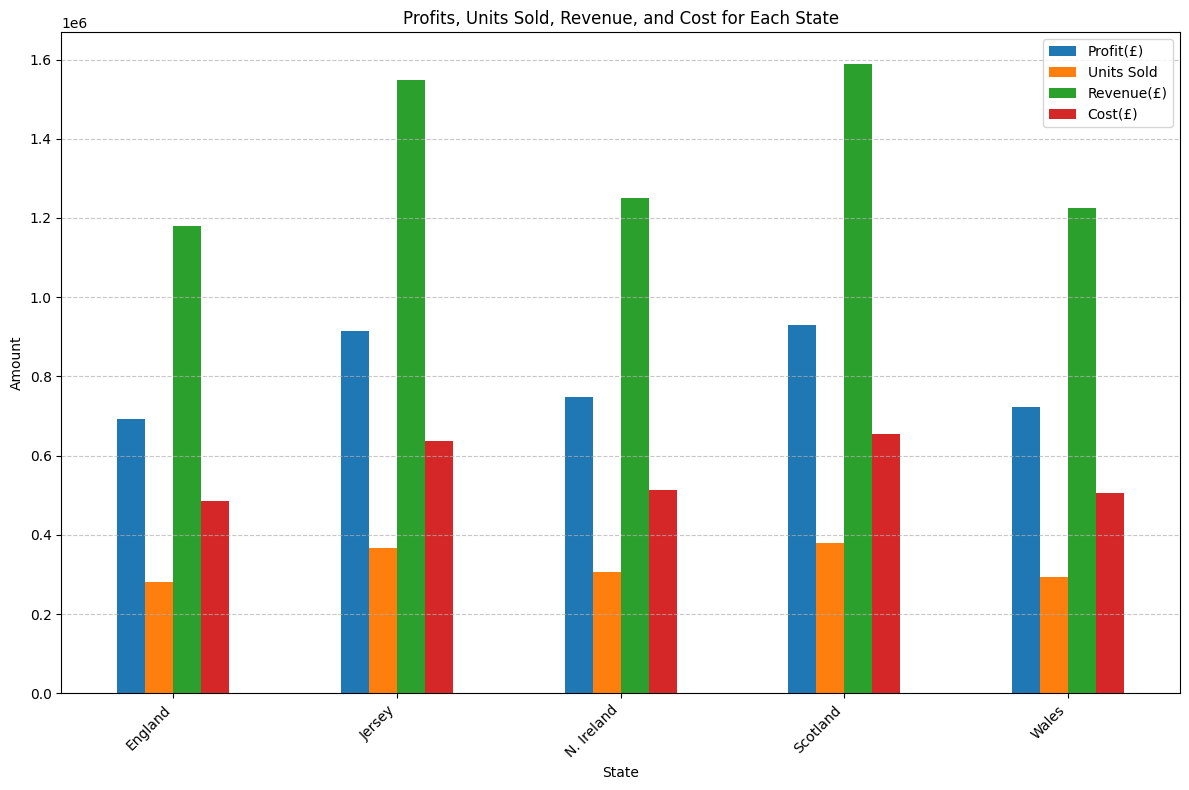

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Grouping data by state and calculating total profits, units sold, revenue, and cost for each state
state_metrics = data.groupby('Country(UK)').agg({'Profit(£)': 'sum', 'Units Sold': 'sum', 'Revenue(£)': 'sum', 'Cost(£)': 'sum'})

# Plotting a grouped bar chart for profits, units sold, revenue, and cost for each state
state_metrics.plot(kind='bar', figsize=(12, 8))
plt.title('Profits, Units Sold, Revenue, and Cost for Each State')
plt.xlabel('State')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Grouping data by state and calculating the sum for each variable
state_sum = data.groupby('Country(UK)').agg({'Profit(£)': 'sum', 'Units Sold': 'sum', 'Revenue(£)': 'sum', 'Cost(£)': 'sum'})

# Print the sum for each state
print("Sum for all four variables for each state:")
print(state_sum)

Sum for all four variables for each state:
             Profit(£)  Units Sold  Revenue(£)    Cost(£)
Country(UK)                                              
England       691348.5    280357.0   1178758.0  485224.85
Jersey        913678.7    366566.0   1548138.0  636434.80
N. Ireland    746995.0    307002.0   1250865.0  514432.00
Scotland      928970.2    379222.0   1589153.0  655616.70
Wales         723059.5    293680.0   1225907.0  505921.00


# 1.7. Clustering K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


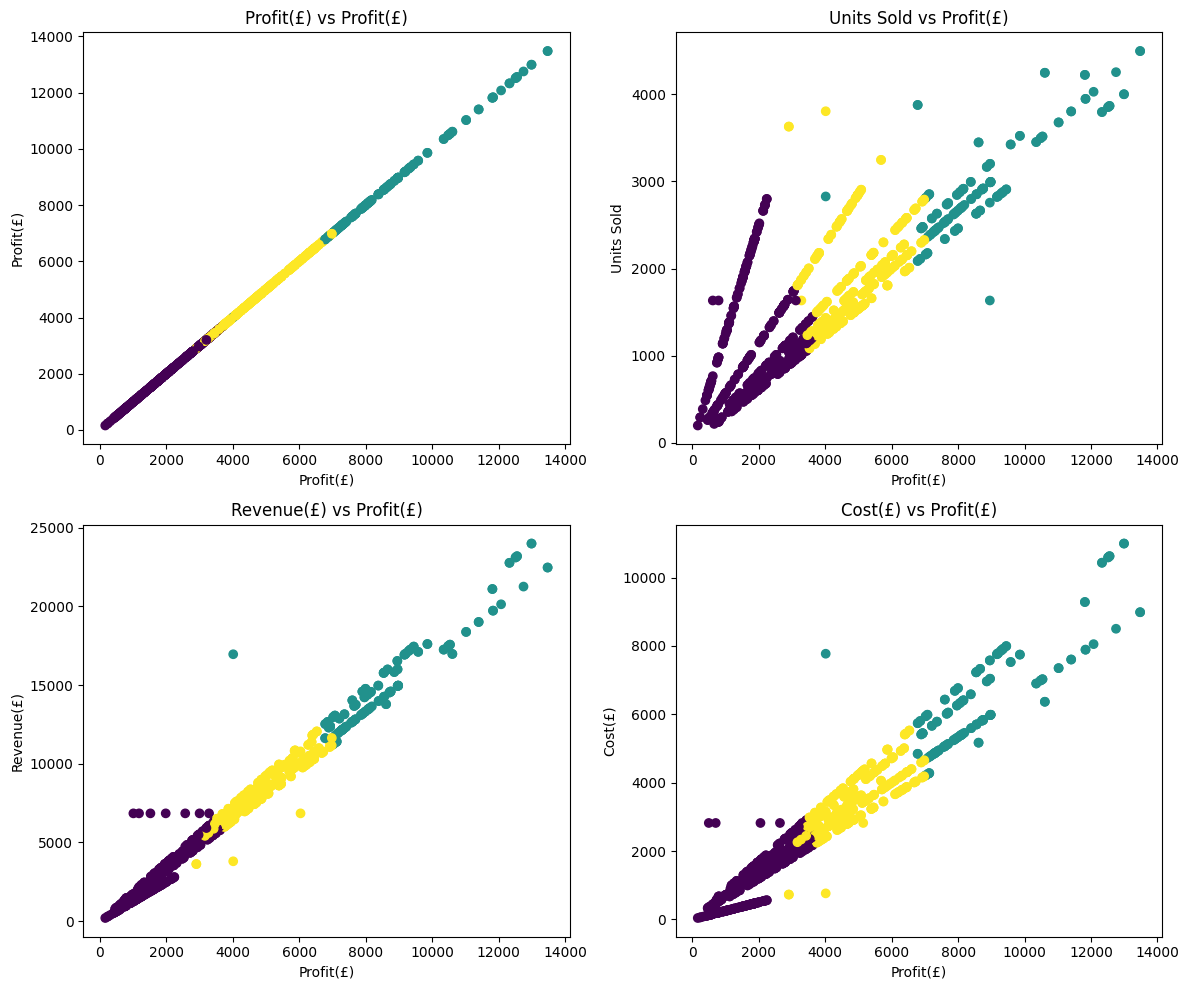

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Selecting features for clustering
features = data[['Profit(£)', 'Units Sold', 'Revenue(£)', 'Cost(£)']]

# Scaling the features
scaled_features = (features - features.mean()) / features.std()

# Performing K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Iterate over each variable and visualize clustering
for i, ax in enumerate(axes.flatten()):
    variable = features.columns[i]
    ax.scatter(data['Profit(£)'], features[variable], c=data['Cluster'], cmap='viridis')
    ax.set_xlabel('Profit(£)')
    ax.set_ylabel(variable)
    ax.set_title(f'{variable} vs Profit(£)')

plt.tight_layout()
plt.show()


In [ ]:
# Print the data with cluster labels
print("Data with Cluster Labels:")
print(data)

Data with Cluster Labels:
     Country(UK)  Confectionary  Units Sold  Revenue(£)  Cost(£)  Profit(£)  \
0        England       Biscuit       1118.0      5590.0   2459.6     3130.4   
1        England       Biscuit        708.0      3540.0   1557.6     1982.4   
2        England       Biscuit       1269.0      6345.0   2791.8     3553.2   
3        England       Biscuit       1631.0      8155.0   3588.2     4566.8   
4        England       Biscuit       2240.0     11200.0   4928.0     6272.0   
...          ...            ...         ...         ...      ...        ...   
996       Jersey   Caramel Nut       1596.0      9576.0   4389.0     5187.0   
997       Jersey   Caramel Nut        986.0      5916.0   2711.5     3204.5   
998       Jersey   Caramel Nut        606.0      3636.0   1666.5     1969.5   
999       Jersey   Caramel Nut       2460.0     14760.0   6765.0     7995.0   
1000      Jersey   Caramel Nut        914.0      5484.0   2513.5     2970.5   

      Cluster  
0        

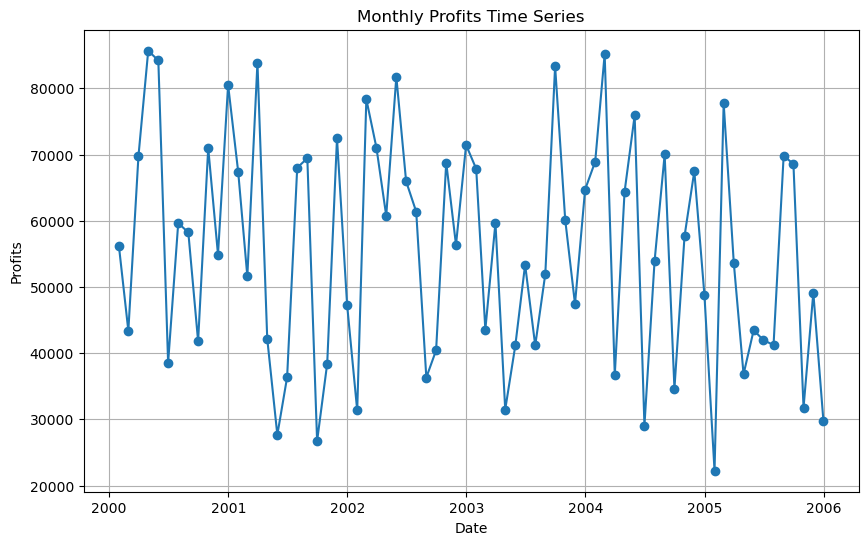

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\PMLS\Desktop\Projects\Python Projects\Ardenuni2\Correct_Assignment data set_Feb_24_SCC.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample the data to monthly frequency and sum the profits for each month
monthly_data = data.resample('M').sum()

# Plot the time series chart for profits
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Profit(£)'], marker='o', linestyle='-')
plt.title('Monthly Profits Time Series')
plt.xlabel('Date')
plt.ylabel('Profits')
plt.grid(True)
plt.show()


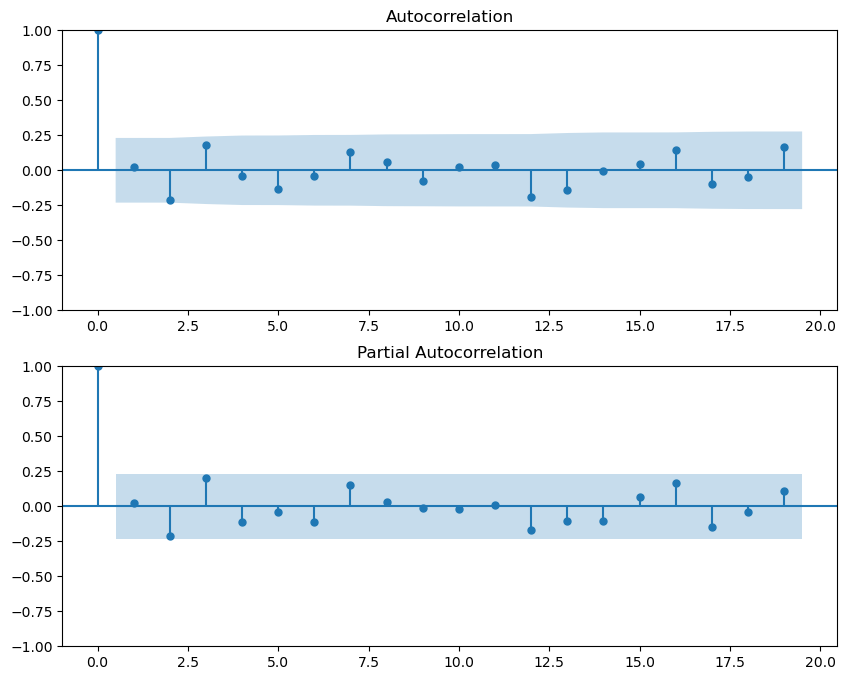

                               SARIMAX Results                                
Dep. Variable:              Profit(£)   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -798.041
Date:                Tue, 07 May 2024   AIC                           1602.082
Time:                        20:35:08   BIC                           1608.870
Sample:                    01-31-2000   HQIC                          1604.781
                         - 12-31-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0695      0.179      0.387      0.698      -0.282       0.421
ma.L1         -0.9778      0.180     -5.438      0.000      -1.330      -0.625
sigma2      4.217e+08   1.53e-10   2.75e+18      0.0

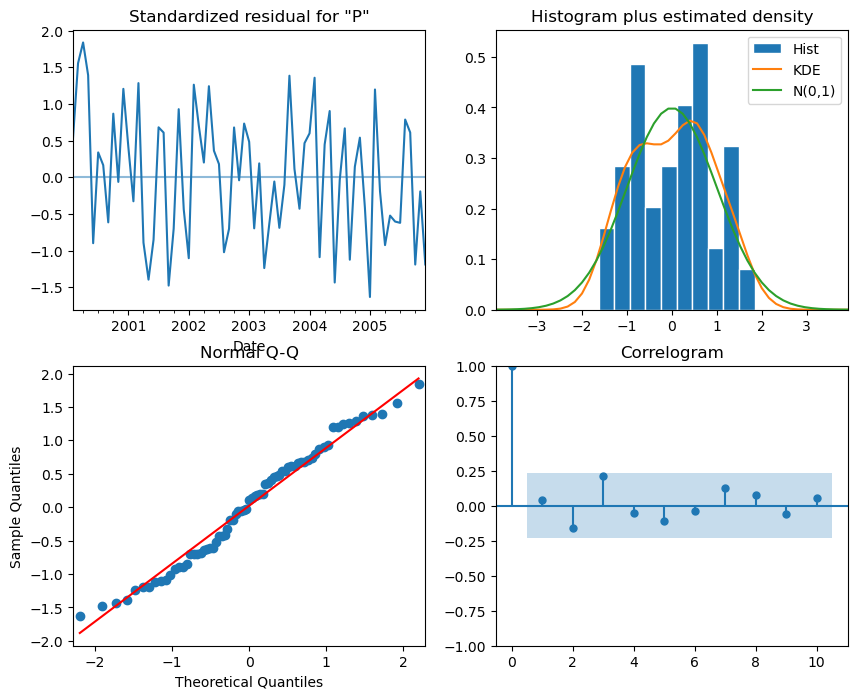

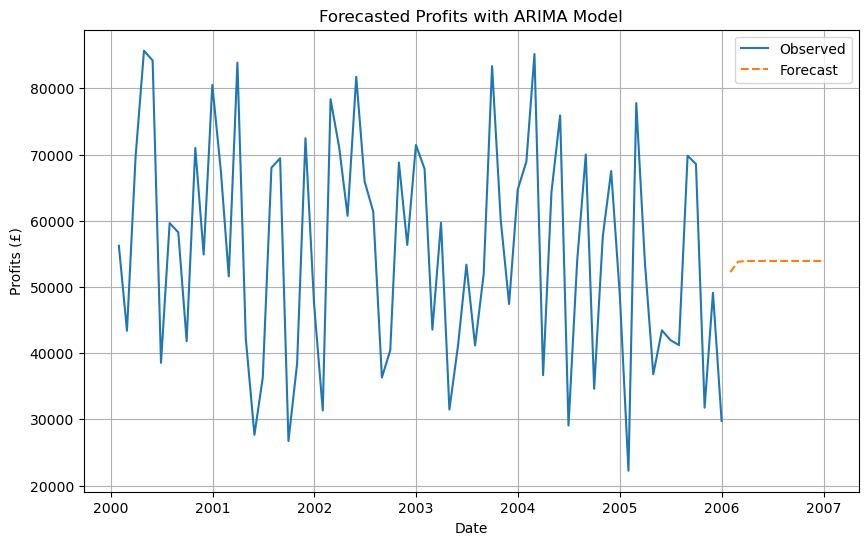

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF plots to determine the order of ARIMA(p,d,q) model
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(monthly_data['Profit(£)'], ax=ax[0])
plot_pacf(monthly_data['Profit(£)'], ax=ax[1])
plt.show()

# Fit ARIMA model
model = ARIMA(monthly_data['Profit(£)'], order=(1,1,1))  # Example order, you may need to adjust
arima_result = model.fit()

# Print summary of the ARIMA model
print(arima_result.summary())

# Plot diagnostics of the ARIMA model
arima_result.plot_diagnostics(figsize=(10, 8))
plt.show()

# Forecast future profits using the ARIMA model
forecast = arima_result.forecast(steps=12)  # Example steps, adjust as needed

# Plot the forecasted profits
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Profit(£)'], label='Observed')
plt.plot(pd.date_range(start=monthly_data.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', linestyle='--')
plt.title('Forecasted Profits with ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Profits (£)')
plt.legend()
plt.grid(True)
plt.show()

Predicted Profits for the next 12 months:
2006-01-31    52251.137429
2006-02-28    53814.184561
2006-03-31    53922.808606
2006-04-30    53930.357439
2006-05-31    53930.882046
2006-06-30    53930.918504
2006-07-31    53930.921037
2006-08-31    53930.921213
2006-09-30    53930.921226
2006-10-31    53930.921226
2006-11-30    53930.921226
2006-12-31    53930.921226
Freq: M, Name: predicted_mean, dtype: float64


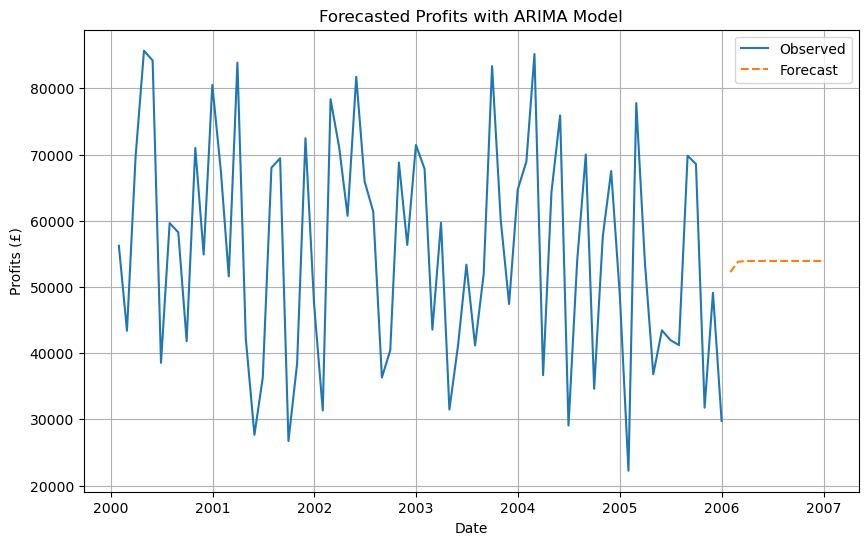

In [5]:
# Forecast future profits using the ARIMA model
forecast_values = arima_result.forecast(steps=12)  # Example steps, adjust as needed

# Print the predicted profits
print("Predicted Profits for the next 12 months:")
print(forecast_values)

# Plot the forecasted profits
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Profit(£)'], label='Observed')
plt.plot(pd.date_range(start=monthly_data.index[-1], periods=13, freq='M')[1:], forecast_values, label='Forecast', linestyle='--')
plt.title('Forecasted Profits with ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Profits (£)')
plt.legend()
plt.grid(True)
plt.show()
